In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('data/user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


### Carga de datos y preparación del entorno
###### Primero, vamos a cargar los datos generados y verificar los primeros registros.

In [2]:
# Cargamos los datos desde el archivo CSV
data = pd.read_csv('data/user_app_data.csv')
# Mostramos las primeras filas para inspección inicial
data.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


#### Limpieza de Datos
###### a) Identificar y eliminar duplicados
###### Es importante verificar duplicados en registros como user_id, ya que cada usuario debe ser único.

In [3]:
# Revisamos si existen duplicados
duplicates = data.duplicated(subset=['user_id']).sum()
print(f"Duplicados encontrados: {duplicates}")

# Eliminamos duplicados
data = data.drop_duplicates(subset=['user_id']).reset_index(drop=True)

Duplicados encontrados: 0


###### b) Manejo de valores faltantes
###### Si hay valores nulos, es esencial decidir cómo tratarlos. Vamos a detectar nulos y usar un método adecuado.

In [4]:
# Revisamos si hay valores nulos
missing_values = data.isnull().sum()
print(f"Valores faltantes por columna:\n{missing_values}")

# Si encontramos valores nulos (en este caso es sintético y no esperamos nulos),
# podríamos usar `data.fillna()` o `data.dropna()` dependiendo de la importancia de las columnas.
# Justificación: si un valor faltante es crítico (ej. `user_id`), eliminaría la fila.

Valores faltantes por columna:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


###### c) Ajuste de tipos de datos
###### Asegurémonos de que los tipos de datos sean correctos según el diccionario:

In [5]:
# Confirmamos tipos de datos iniciales
print("Tipos de datos antes del ajuste:\n", data.dtypes)

# Ajustamos los tipos de datos de cada columna
data['user_id'] = data['user_id'].astype(int)
data['app_version'] = data['app_version'].astype(str)
data['platform'] = data['platform'].astype(str)
data['session_duration'] = data['session_duration'].astype(int)
data['number_of_sessions'] = data['number_of_sessions'].astype(int)
data['country'] = data['country'].astype(str)
data['user_feedback'] = data['user_feedback'].astype(int)

# Verificamos los tipos de datos después del ajuste
print("\nTipos de datos después del ajuste:\n", data.dtypes)


Tipos de datos antes del ajuste:
 user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object

Tipos de datos después del ajuste:
 user_id                int64
app_version           object
platform              object
session_duration       int64
number_of_sessions     int64
country               object
user_feedback          int64
dtype: object


###### d) Normalización de valores categóricos
###### Valores en platform pueden estar inconsistentes debido a diferentes mayúsculas.

In [6]:
# Convertimos los valores de 'platform' a una forma consistente
data['platform'] = data['platform'].str.capitalize()

# Verificamos los valores únicos para confirmar
print(data['platform'].unique())

['Android' 'Ios']


###### e) Identificación de valores atípicos
###### Evaluaremos session_duration y number_of_sessions para detectar valores fuera del rango esperado.

In [7]:
# Revisamos estadísticas para identificar valores atípicos
data[['session_duration', 'number_of_sessions']].describe()

# Identificamos y eliminamos valores de `session_duration` mayores a un umbral atípico (ej., 1000 min)
data = data[data['session_duration'] <= 1000]

#### Exploración de Datos

###### a) Visualizaciones univariantes
###### Para esta sección, se pueden realizar gráficos de distribución o conteo para columnas clave como user_feedback y platform.

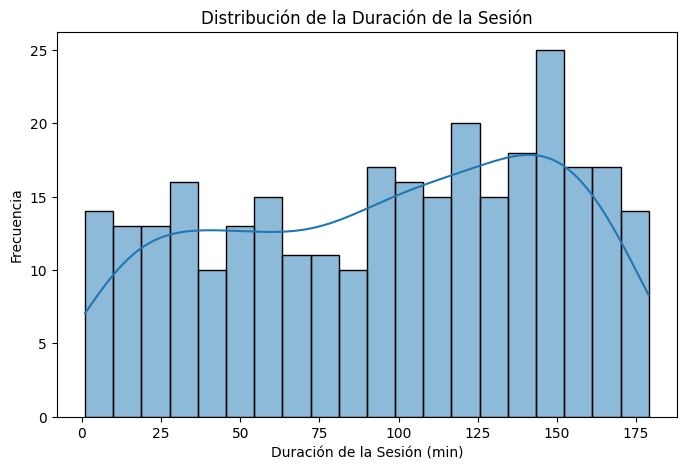

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos visualización en Jupyter Notebook
%matplotlib inline

# Histograma para la duración de sesiones
plt.figure(figsize=(8, 5))
sns.histplot(data['session_duration'], bins=20, kde=True)
plt.title('Distribución de la Duración de la Sesión')
plt.xlabel('Duración de la Sesión (min)')
plt.ylabel('Frecuencia')
plt.show()
#Interpretación: Esto permite ver la distribución general de tiempo que los usuarios pasan en la app, ayudando a identificar picos de uso.

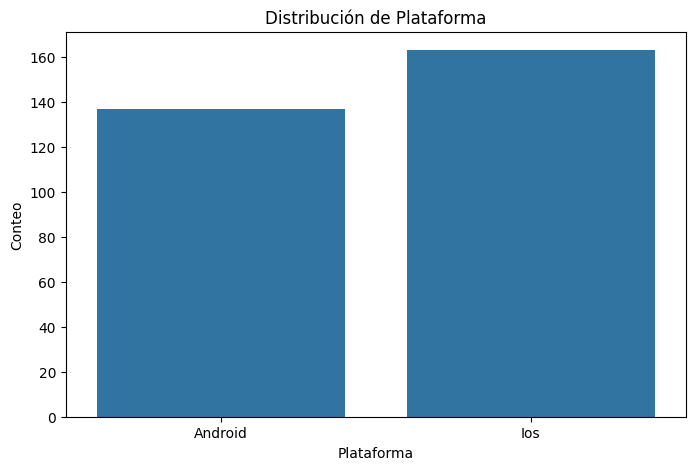

In [9]:
# Gráfico de conteo para la plataforma
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='platform')
plt.title('Distribución de Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Conteo')
plt.show()

#Interpretación: Esta visualización ayuda a entender la base de usuarios en términos de plataforma, útil para saber en qué plataforma enfocarse.

###### b) Visualizaciones multivariantes
###### Para exploraciones multivariantes, utilizaremos gráficos como diagramas de dispersión para explorar relaciones.

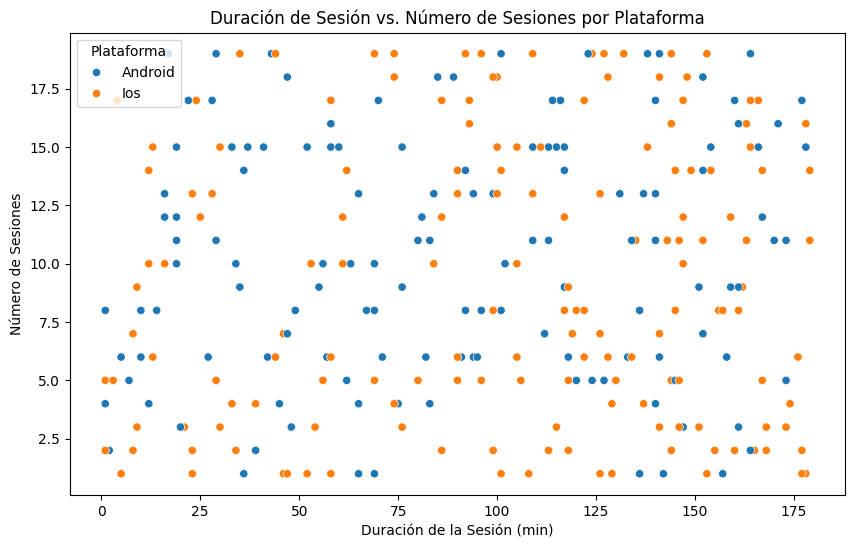

In [10]:
# Diagrama de dispersión entre duración de sesión y número de sesiones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='session_duration', y='number_of_sessions', hue='platform')
plt.title('Duración de Sesión vs. Número de Sesiones por Plataforma')
plt.xlabel('Duración de la Sesión (min)')
plt.ylabel('Número de Sesiones')
plt.legend(title='Plataforma')
plt.show()
#Interpretación: Esto nos muestra si hay correlación entre duración de sesión y cantidad de sesiones, posiblemente por plataforma.

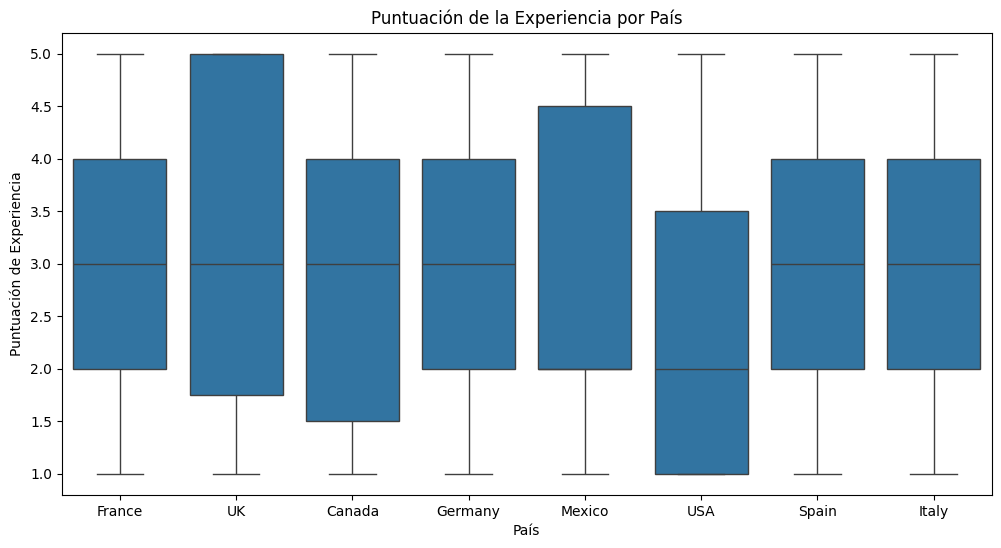

In [11]:
# Gráfico de caja para `user_feedback` por `country`
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='country', y='user_feedback')
plt.title('Puntuación de la Experiencia por País')
plt.xlabel('País')
plt.ylabel('Puntuación de Experiencia')
plt.show()
#nterpretación: Esto permite evaluar diferencias en la satisfacción del usuario por país, ayudando a identificar áreas de mejora en ciertos mercados.